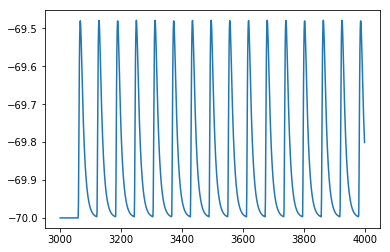

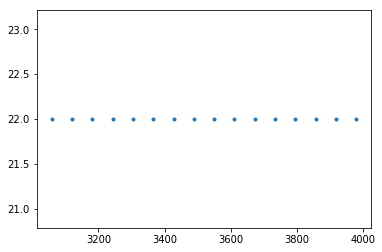

In [15]:
import pylab
import nest
neuron1 = nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron1, {"I_e": 376.0})
neuron2 = nest.Create("iaf_psc_alpha")
multimeter = nest.Create("multimeter")
spikedetector = nest.Create("spike_detector",params={"withgid": True, "withtime": True})
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
nest.Connect(neuron1, neuron2, syn_spec = {"weight":20.0})
nest.Connect(multimeter, neuron2)
nest.Connect(neuron1, spikedetector)
nest.Connect(neuron1, neuron2, syn_spec={"weight":20, "delay":1.0})
nest.Simulate(1000.0)
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]
pylab.figure(1)
pylab.plot(ts, Vms)
dSD = nest.GetStatus(spikedetector,keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
pylab.figure(2)
pylab.plot(ts, evs, ".")
pylab.show()